# Visualisierung der Entwicklung des realen BIP in der Schweiz

In diesem Notebook wird die Entwicklung des realen BIP in der Schweiz
visualisiert. Die verwendeten Daten stammen vom Bundesamt für Statistik
und vom SECO.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('231113_rohdaten.csv', sep=';')

print(df.head())

   Jahr  BIP (in Mio CHF)    LIK
0  1980            205370  108.6
1  1981            220471  115.7
2  1982            233573  122.2
3  1983            240629  125.8
4  1984            257187  129.5


In [4]:
LIK_Basisjahr = df['LIK'][0]
df['BIP real'] = [i / j * LIK_Basisjahr for i, j in zip(df['BIP (in Mio CHF)'], df['LIK'])]

print(df.to_string())

    Jahr  BIP (in Mio CHF)    LIK       BIP real
0   1980            205370  108.6  205370.000000
1   1981            220471  115.7  206941.664650
2   1982            233573  122.2  207577.968903
3   1983            240629  125.8  207729.009539
4   1984            257187  129.5  215679.600000
5   1985            272690  133.9  221166.049291
6   1986            286187  134.9  230392.203113
7   1987            297101  136.9  235684.211833
8   1988            315401  139.5  245537.982796
9   1989            340440  143.9  256926.921473
10  1990            369199  151.6  264478.967018
11  1991            385605  160.5  260914.037383
12  1992            393626  167.0  255974.752096
13  1993            402258  172.5  253247.645217
14  1994            412191  174.0  257264.037931
15  1995            417228  177.1  255849.581028
16  1996            420368  178.5  255753.304202
17  1997            427826  179.5  258840.688579
18  1998            439955  179.5  266178.902507
19  1999            

<Axes: title={'center': 'BIP real'}, xlabel='Jahr'>

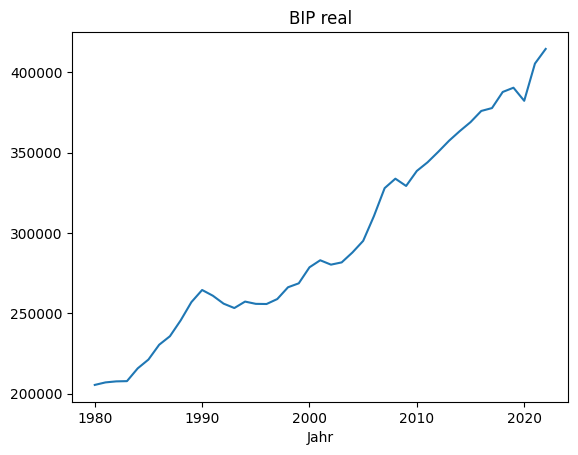

In [5]:
df.plot(x='Jahr', y='BIP real', kind='line', title='BIP real', legend=False)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

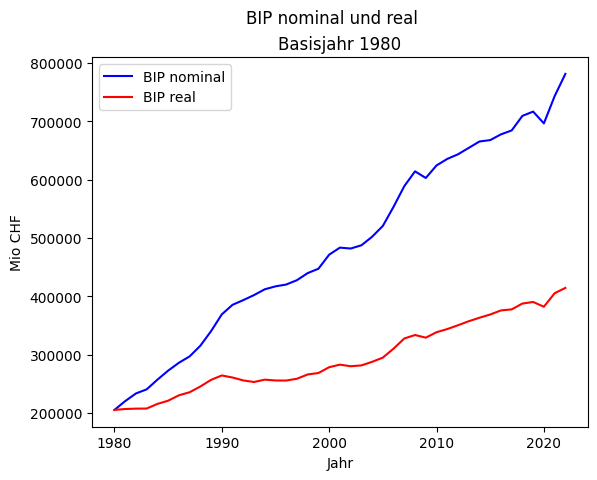

In [10]:
# data
x = df['Jahr']
bip_n = df['BIP (in Mio CHF)']
bip_r = df['BIP real']

# plot
fig, ax = plt.subplots()
ax.plot(x, bip_n, color='blue', label='BIP nominal')
ax.plot(x, bip_r, color='red', label='BIP real')
ax.legend(loc='upper left')

plt.suptitle('BIP nominal und real')
plt.title('Basisjahr 1980')
plt.xlabel('Jahr')  # x-Achse beschriften
plt.ylabel('Mio CHF')  # y-Achse beschriften

plt.show()

Das nominale BIP steigt stärker als das reale. Dies rührt dahrer, dass
die Preise, wie sie im LIK abgebildet werden, im Beobachtungszeitraum
gestiegen sind. Die Differenz zwischen den beiden Kurven ist damit der
Inflation geschuldet.

Zwischen 2008 und 2021 scheinen die beiden Kurven allerdings weitgehend
parallel zu verlaufen. Um dies zu prüfen, wird in einem nächsten Schritt
das Referenzjahr auf das Jahr 2008 festgelegt.

In [7]:
LIK_Basisjahr_2008 = df['LIK'][28]
df['BIP real 2008'] = [i / j * LIK_Basisjahr_2008 for i, j in zip(df['BIP (in Mio CHF)'], df['LIK'])]
print(df.head())

   Jahr  BIP (in Mio CHF)    LIK       BIP real  BIP real 2008
0  1980            205370  108.6  205370.000000  378024.521179
1  1981            220471  115.7  206941.664650  380917.484010
2  1982            233573  122.2  207577.968903  382088.729133
3  1983            240629  125.8  207729.009539  382366.749603
4  1984            257187  129.5  215679.600000  397001.400000


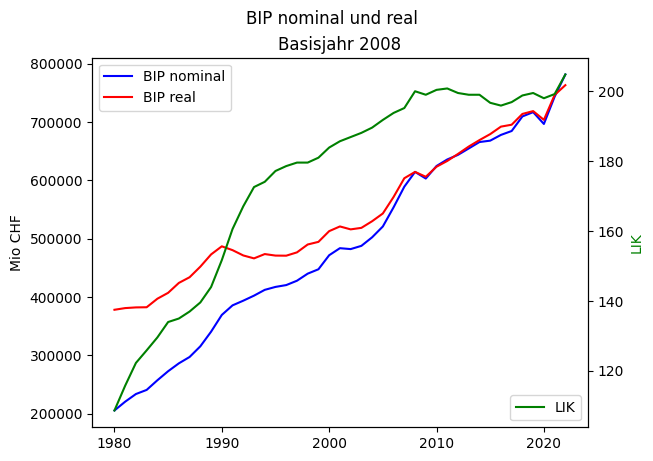

In [11]:
# data
x = df['Jahr']
bip_n = df['BIP (in Mio CHF)']
bip_r = df['BIP real 2008']

# plot
fig, ax = plt.subplots()
ax.plot(x, bip_n, color='blue', label='BIP nominal')
ax.plot(x, bip_r, color='red', label='BIP real')
ax.set_ylabel('Mio CHF')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(x, df['LIK'], color='green', label='LIK')
ax2.set_ylabel('LIK', color='green')
ax2.legend(loc='lower right')

plt.suptitle('BIP nominal und real')
plt.title('Basisjahr 2008')
plt.xlabel('Jahr')  # x-Achse beschriften
# plt.ylabel('Mio CHF')  # y-Achse beschriften

plt.show()

Die oben geäusserte Vermutung trifft zu. Zwischen 2008 und 2021 sind die
Kurve des ralen und des nominalen BIP praktisch deckungsgleich. Dies
wird durch die Entwicklung des LIK verdeutlicht. Wenn man grosszügig auf
die Grafik schaut, entwickelt sich der LIK im fraglichen Zeitraum
praktisch horizontal.

Um die Aussage noch deutlicher zu machen, wird als nächstes der LIK
relativ zum Vorjahr dargestellt.

In [9]:
rel = []
i = 0

while i < len(df['LIK']) -1:
    rel.append(((df['LIK'][i+1] - df['LIK'][i]) / df['LIK'][i])* 100)
    i += 1
    
rel = [4.023] + rel
df['LIK rel'] = rel

print(df.to_string())

    Jahr  BIP (in Mio CHF)    LIK       BIP real  BIP real 2008   LIK rel
0   1980            205370  108.6  205370.000000  378024.521179  4.023000
1   1981            220471  115.7  206941.664650  380917.484010  6.537753
2   1982            233573  122.2  207577.968903  382088.729133  5.617978
3   1983            240629  125.8  207729.009539  382366.749603  2.945990
4   1984            257187  129.5  215679.600000  397001.400000  2.941176
5   1985            272690  133.9  221166.049291  407100.306199  3.397683
6   1986            286187  134.9  230392.203113  424082.885841  0.746826
7   1987            297101  136.9  235684.211833  433823.885318  1.482580
8   1988            315401  139.5  245537.982796  451961.719713  1.899196
9   1989            340440  143.9  256926.921473  472925.337040  3.154122
10  1990            369199  151.6  264478.967018  486826.385884  5.350938
11  1991            385605  160.5  260914.037383  480264.420561  5.870712
12  1992            393626  167.0  255

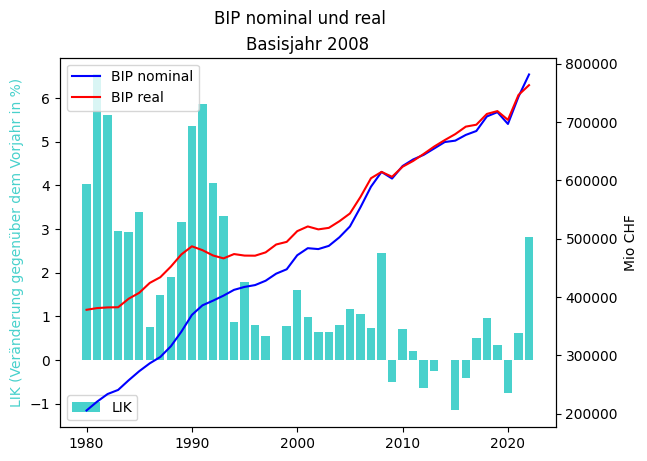

In [12]:
# data
x = df['Jahr']
bip_n = df['BIP (in Mio CHF)']
bip_r = df['BIP real 2008']

# plot
fig, ax1 = plt.subplots()
ax1.bar(x, df['LIK rel'], color='mediumturquoise', label='LIK')
ax1.set_ylabel('LIK (Veränderung gegenüber dem Vorjahr in %)', color='mediumturquoise')
ax1.legend(loc='lower left')

ax2 = ax1.twinx()
ax2.plot(x, bip_n, color='blue', label='BIP nominal')
ax2.plot(x, bip_r, color='red', label='BIP real')
ax2.set_ylabel('Mio CHF')
ax2.legend(loc='upper left')


plt.suptitle('BIP nominal und real')
plt.title('Basisjahr 2008')
plt.xlabel('Jahr')  # x-Achse beschriften

plt.show()

Die Darstellung der relativen Veränderung des LIK zeigt deutlich, dass
ab 2008 eine Phase tiefer bis sogar netagiver Inflation beginnt. Ob dies
andauert, kann aktuell noch nicht abschliessend beurteilt werden. Es
mehren sich allerdings die Anzeichen, dass die Inflation wieder zurück ist.